# Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read DataFrame

In [60]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')

In [61]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [62]:
df.shape

(60, 2)

In [63]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


# Scattered Plot

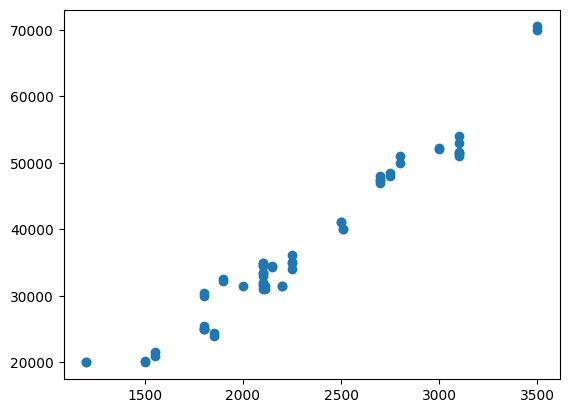

In [65]:
plt.scatter(df['area'], df['rent'])

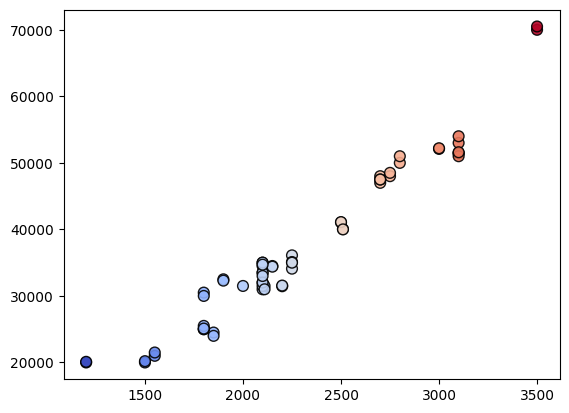

In [66]:
plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

In [67]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


# HardCoded Linear Regression

In [68]:
x = df['area']
y = df['rent']
dev_x = x - np.mean(x)
dev_y = y - np.mean(y)

In [69]:
m = np.sum(dev_x * dev_y)/ np.sum(dev_x**2)

In [70]:
m

21.292661473611954

In [71]:
c = np.mean(y) - (m*np.mean(x))

In [72]:
c

-11469.7354464311

In [73]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [74]:
#y=mx+c
m*2500 + c

41761.91823759879

In [75]:
m*3000	 + c

52408.24897440476

# Linear Regression

In [76]:
reg = LinearRegression()

In [77]:
reg.fit(df[['area']], y)

LinearRegression()

In [78]:
reg.coef_

array([21.29266147])

In [79]:
reg.intercept_

-11469.735446431114

In [80]:
reg.predict([[2500]])

c:\Users\88016\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41761.9182376])

In [81]:
reg.predict(df[['area']])

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [82]:
df2 = df.copy()

In [83]:
df2['Predicted'] = reg.predict(df[['area']])
df2.head()

,area,rent,Predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [84]:
reg.score(df[['area']], df[['rent']])

0.950249380357677

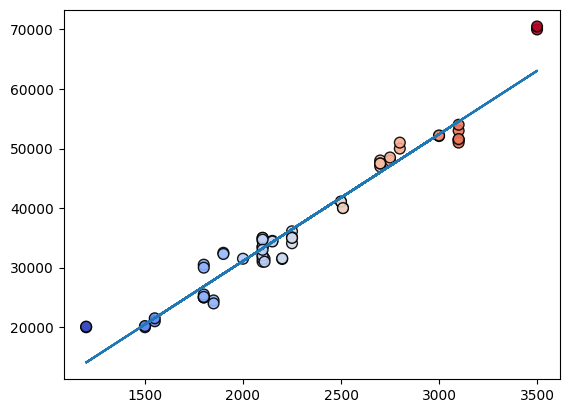

In [85]:
plt.plot(df[['area']], reg.predict(df[['area']]))

plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

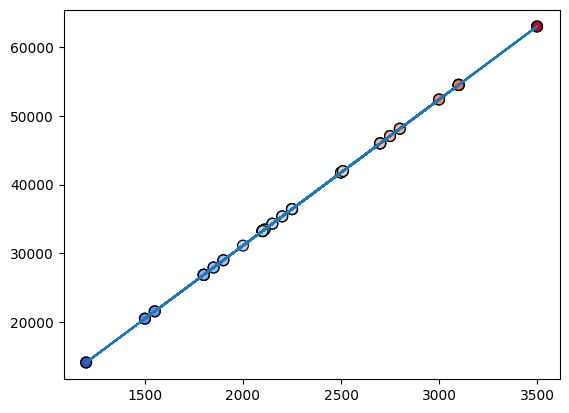

In [86]:
plt.plot(df[['area']], reg.predict(df[['area']]))

plt.scatter(df['area'], 
            reg.predict(df[['area']]), 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

[]

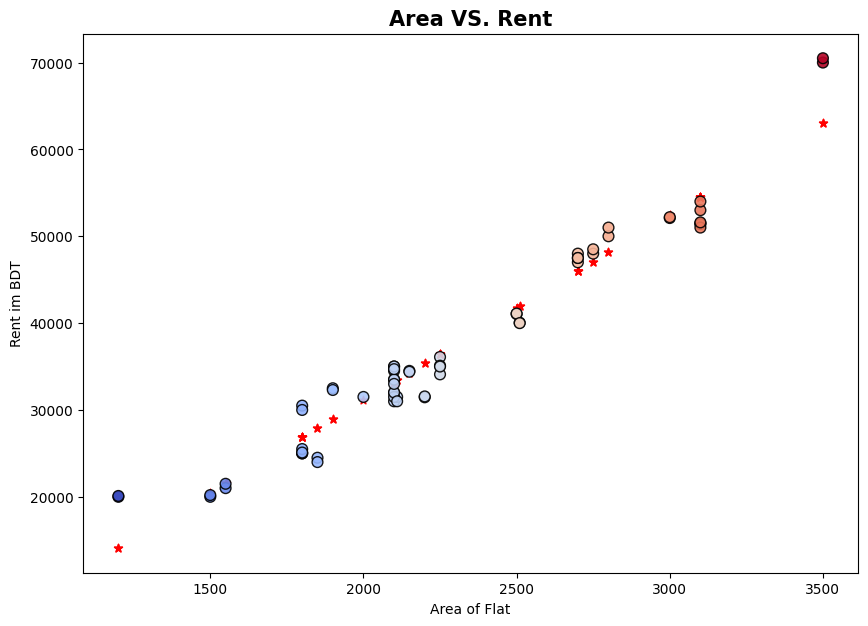

In [87]:
plt.figure(figsize=(10,7))

plt.scatter(df['area'],reg.predict(df[['area']]),color='red', marker='*') #shift + tab

plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

plt.xlabel('Area of Flat', fontsize=10)
plt.ylabel('Rent im BDT',fontsize=10)
plt.title('Area VS. Rent',fontsize=15, weight='bold')

plt.plot()